In [1]:
import tensorflow as tf

In [2]:
print("Tensorflow version: {}".format(tf.__version__))

Tensorflow version: 2.10.0


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images = np.expand_dims(train_images, -1)

In [8]:
train_images.shape

(60000, 28, 28, 1)

In [9]:
test_images = np.expand_dims(test_images, -1)

In [19]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3),input_shape = train_images.shape[1:], activation = "relu", padding = "same"))
model.add(keras.layers.Conv2D(64, (3, 3),input_shape = train_images.shape[1:], activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(128, (3,3),activation = "relu", padding = "same"))
model.add(keras.layers.Conv2D(128, (3,3),activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(256, (3,3),activation = "relu", padding = "same"))
model.add(keras.layers.Conv2D(256, (3,3),activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(512, (3,3),activation = "relu", padding = "same"))
model.add(keras.layers.Conv2D(512, (3,3),activation = "relu", padding = "same"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       147584    
                                                      

In [21]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["acc"]
)

In [ ]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1017/1875 [===============>..............] - ETA: 23:10 - loss: 0.8748 - acc: 0.6835

In [16]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

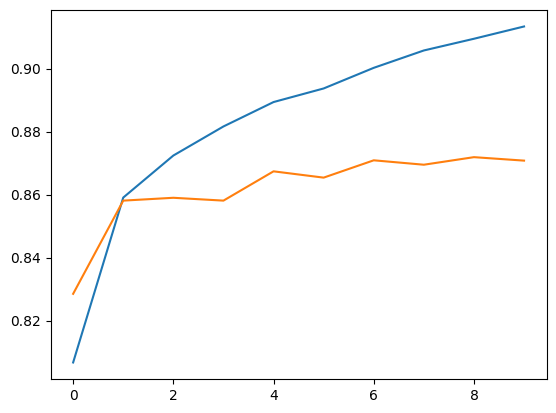

In [17]:
plt.plot(history.epoch, history.history.get("acc"), label = "acc")
plt.plot(history.epoch, history.history.get("val_acc"), label = "val_acc")

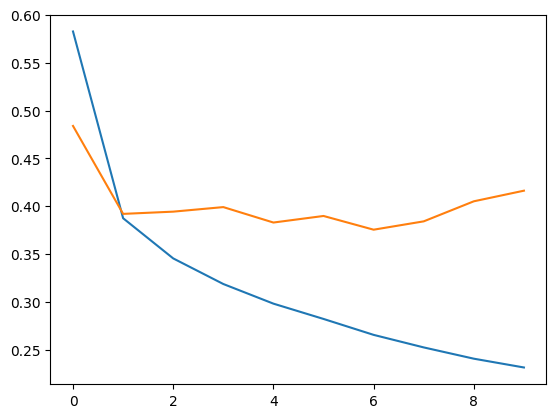

In [18]:
plt.plot(history.epoch, history.history.get("loss"), label = "loss")
plt.plot(history.epoch, history.history.get("val_loss"), label = "val_loss")